<a href="https://colab.research.google.com/github/esevinc/SER/blob/main/RavdesFisher_65.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
main_dir='drive/MyDrive/SER/'

data = pd.read_csv(main_dir+'../ravdes/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureNormal_Ek.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

EmoDBFisher_Fem_75.ipynb   Femalemodel2.json	  RavdesFisherFemale_75.ipynb  RAVDESS_Model_Female
EmoDBFisher_Male_75.ipynb  Femalemodel3.json	  RavdesFisherMale_75.ipynb    RAVDESS_Model_Male75
Emodb_Model75		   Femalemodel4.json	  ravdesMale_5FoldsMale.png
Femalemodel0.json	   peerj		  ravdesMale_75.png
Femalemodel1.json	   RavdesFisher_50.ipynb  RAVDESS_Model50


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,0.1,0.2
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,17.645388,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,17.582760,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,17.437520,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,16.492804,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,17.020093,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8


In [ ]:
data.shape

(1440, 195)

In [ ]:
df=data.loc[data.iloc[:,-2] == 0] #female
#ymale=data.loc[data.iloc[:,-2] == 1]

In [ ]:
data.iloc[:,-2] == 0 #female

0       False
1       False
2       False
3       False
4       False
        ...  
1435     True
1436     True
1437     True
1438     True
1439     True
Name: 0.1, Length: 1440, dtype: bool

In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,15.032267,17.122944,17.137267,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,15.800671,16.939402,16.786359,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,15.484927,17.181703,18.043089,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,15.257555,16.719364,17.726324,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,16.251168,17.629721,16.558219,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [ ]:
#y=y-1
y

60      1
61      1
62      1
63      1
64      2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: 0.2, Length: 720, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,15.032267,17.122944,17.137267,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,15.800671,16.939402,16.786359,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,15.484927,17.181703,18.043089,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,15.257555,16.719364,17.726324,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,16.251168,17.629721,16.558219,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [ ]:
X.shape, y

((720, 193),
 60      1
 61      1
 62      1
 63      1
 64      2
        ..
 1435    8
 1436    8
 1437    8
 1438    8
 1439    8
 Name: 0.2, Length: 720, dtype: int64)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((720, 193), (720, 8))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,15.032267,17.122944,17.137267,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,15.800671,16.939402,16.786359,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,15.484927,17.181703,18.043089,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,15.257555,16.719364,17.726324,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,16.251168,17.629721,16.558219,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [ ]:
#########fisher score

In [ ]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [ ]:
from skfeature.function.similarity_based import fisher_score
fisherindex = fisher_score.fisher_score(X2, y2, mode='index')
score  = fisher_score.fisher_score(X2, y2)

In [ ]:
fisherindex

array([  0,   2,   1,  20, 185,   5,   4,   3, 182, 183, 155, 154, 157,
       184,  35,  22, 153,  21,  17, 141, 151,  34, 142, 150, 156, 140,
        19,  45, 132,  44,  23, 143, 152, 133, 186, 144, 131, 139, 179,
       129, 158, 138, 130, 136,  33,  18, 166, 177,  36,  55, 115, 149,
       122, 123, 105,  87, 178, 176,   7,  74, 174,  75, 104,  43, 137,
       173,  41, 145, 171,  24, 175, 134,  93,  76,  56, 165,  12, 146,
       147,  77,  32,  37,  80,  42, 180, 116, 109, 170, 159,  40,  90,
        95,  94, 106, 172,  99, 113, 164,  57, 148, 110, 103, 117,   6,
        10,  51,  79,  92, 181,  25, 102, 163, 128, 161, 135, 114,  88,
       111,  91, 108,  58,  89, 124,  31,  16,  38, 167, 160,  62,  39,
       162,  46,  14,  15,  85, 112, 169,   9, 101,  86,  83, 100,  48,
        13,  63,  65,  78,  59,  60,  96,  54,  26, 168, 118, 119,  81,
       120, 125,  61,  84,  73,  97,  47,  98,  11,   8, 107,  66,  50,
        49,  64,  70,  69,  82, 126, 121, 189,  68, 192,  67, 12

In [ ]:
score

array([192, 190, 191, 172,   7, 187, 188, 189,  10,   9,  37,  38,  35,
         8, 157, 170,  39, 171, 175,  51,  41, 158,  50,  42,  36,  52,
       173, 147,  60, 148, 169,  49,  40,  59,   6,  48,  61,  53,  13,
        63,  34,  54,  62,  56, 159, 174,  26,  15, 156, 137,  77,  43,
        70,  69,  87, 105,  14,  16, 185, 118,  18, 117,  88, 149,  55,
        19, 151,  47,  21, 168,  17,  58,  99, 116, 136,  27, 180,  46,
        45, 115, 160, 155, 112, 150,  12,  76,  83,  22,  33, 152, 102,
        97,  98,  86,  20,  93,  79,  28, 135,  44,  82,  89,  75, 186,
       182, 141, 113, 100,  11, 167,  90,  29,  64,  31,  57,  78, 104,
        81, 101,  84, 134, 103,  68, 161, 176, 154,  25,  32, 130, 153,
        30, 146, 178, 177, 107,  80,  23, 183,  91, 106, 109,  92, 144,
       179, 129, 127, 114, 133, 132,  96, 138, 166,  24,  74,  73, 111,
        72,  67, 131, 108, 119,  95, 145,  94, 181, 184,  85, 126, 142,
       143, 128, 122, 123, 110,  66,  71,   3, 124,   0, 125,  6

In [ ]:
num_fea=125
a=[]
for i in range(193):
    if(fisherindex[i]<num_fea): a.append(fisherindex[i])

In [ ]:
print(a, len(a))

[0, 2, 1, 20, 5, 4, 3, 35, 22, 21, 17, 34, 19, 45, 44, 23, 33, 18, 36, 55, 115, 122, 123, 105, 87, 7, 74, 75, 104, 43, 41, 24, 93, 76, 56, 12, 77, 32, 37, 80, 42, 116, 109, 40, 90, 95, 94, 106, 99, 113, 57, 110, 103, 117, 6, 10, 51, 79, 92, 25, 102, 114, 88, 111, 91, 108, 58, 89, 124, 31, 16, 38, 62, 39, 46, 14, 15, 85, 112, 9, 101, 86, 83, 100, 48, 13, 63, 65, 78, 59, 60, 96, 54, 26, 118, 119, 81, 120, 61, 84, 73, 97, 47, 98, 11, 8, 107, 66, 50, 49, 64, 70, 69, 82, 121, 68, 67, 53, 30, 71, 27, 29, 72, 52, 28] 125


In [ ]:
selected_features = X2[:,a]

In [ ]:
selected_features, selected_features.shape

(array([[-6.26065857e+02, -1.45061035e+01,  6.71292114e+01, ...,
          5.20714279e-03,  1.10181090e-05,  2.49339175e+00],
        [-6.22978882e+02, -1.61552811e+01,  6.16102409e+01, ...,
          6.00988371e-03,  1.10060537e-05,  3.10458565e+00],
        [-5.94977844e+02, -1.62577801e+01,  6.26938286e+01, ...,
          1.35517582e-01,  1.83469856e-05,  2.93323326e+00],
        ...,
        [-5.17733276e+02, -2.72174416e+01,  4.04596329e+01, ...,
          4.28693444e-01,  5.39949360e-05,  6.13196194e-01],
        [-4.63998352e+02, -1.42607832e+01,  3.54969254e+01, ...,
          9.49792340e-02,  4.08025272e-03, -8.74016881e-01],
        [-4.99242126e+02, -8.36169529e+00,  3.95404968e+01, ...,
          2.80622661e-01,  1.66671127e-02,  6.73815668e-01]]),
 (720, 125))

In [ ]:
X3=pd.DataFrame(selected_features)
X3

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-626.065857,-14.506104,67.129211,-0.492106,-0.597560,-8.915299,13.734784,2.562386,-0.584655,-1.166412,...,0.085684,0.075401,0.000051,0.957261,0.011911,-1.326098,0.665574,0.005207,0.000011,2.493392
1,-622.978882,-16.155281,61.610241,-0.757748,-0.012929,-10.515155,17.274385,3.438142,-1.823772,-2.015452,...,0.074816,0.027939,0.000025,1.344043,0.014507,-1.916556,1.728060,0.006010,0.000011,3.104586
2,-594.977844,-16.257780,62.693829,-0.405246,-0.249130,-9.175509,9.051161,4.458579,-0.620401,-0.516156,...,0.075948,0.028289,0.000060,0.333440,0.127847,3.007311,2.887468,0.135518,0.000018,2.933233
3,-612.936279,-15.687172,58.990162,-0.750733,-1.830589,-11.711167,10.080914,5.752499,-2.187827,-2.110827,...,0.048669,0.043064,0.000023,2.611422,0.118308,2.972829,4.853305,0.085326,0.000005,4.017501
4,-639.557617,-8.859457,64.624420,-2.314848,2.161584,-9.782133,17.944416,2.831547,-1.273513,-2.530665,...,0.011124,0.003692,0.000038,4.143136,0.022862,5.464410,5.590356,0.032539,0.000027,8.637901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-558.443298,-25.876736,34.201637,0.744685,-6.289969,-22.962826,3.420890,-2.260234,-0.272697,0.603423,...,0.075476,0.081033,0.000012,-1.084799,0.151665,5.440038,-0.247932,0.148500,0.000001,2.152255
716,-509.914642,-22.979485,49.378990,-1.837317,-10.238819,-23.050257,-0.832579,0.838848,2.687783,1.452663,...,0.196916,0.130984,0.000103,-1.447214,0.108095,4.673117,-0.465370,0.364397,0.000067,1.931601
717,-517.733276,-27.217442,40.459633,-0.603973,-14.189220,-22.611633,2.902560,0.558064,1.165252,3.088328,...,0.370679,0.183584,0.000023,1.011409,0.319389,4.127891,0.341090,0.428693,0.000054,0.613196
718,-463.998352,-14.260783,35.496925,6.432075,0.799514,-19.878208,9.399699,0.613665,5.269444,4.869069,...,0.781644,1.285365,0.001498,-0.865850,0.193007,2.376178,0.533465,0.094979,0.004080,-0.874017


In [ ]:
X.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
60,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,-7.912409,-0.210760,-7.740003,1.756948,-9.324497,-1.198008,-4.133364,-1.631853,-2.066447,-0.454988,-0.492106
61,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,-6.152109,-0.615899,-8.214749,1.275640,-8.237226,-2.645824,-3.443796,-0.612220,-2.490293,-0.452201,-0.757748
62,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,-8.104342,-1.270707,-9.362936,3.294116,-8.703416,-2.625140,-4.680979,-3.360180,-1.953824,0.267930,-0.405246
63,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,-9.551315,-1.466953,-12.188832,1.340084,-10.352579,-2.398706,-4.686605,-4.565247,-2.227786,-0.699804,-0.750733
64,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,-6.652872,-2.524537,-7.584999,3.084172,-8.050755,-1.479591,-4.934464,-1.571014,-5.846342,-1.533878,-2.314848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,-13.470782,-0.407410,-9.948418,5.518756,2.247648,1.531702,-2.982210,0.129457,-4.504814,1.020297,0.744685
1436,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,-14.131364,8.980473,-5.571723,2.803077,-0.283363,-2.442273,-3.839922,-1.522143,-2.926482,0.365428,-1.837317
1437,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,-11.430717,9.099095,-7.937002,1.855414,-1.323820,-2.413804,-1.276750,0.090517,-6.109476,3.518335,-0.603973
1438,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,-11.528538,1.779407,-12.382866,5.248011,-3.515553,-0.067374,-4.443567,4.867039,-2.615891,4.354655,6.432075


In [ ]:
X3.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,67.129211,-0.492106,-0.597560,-8.915299,13.734784,2.562386,-0.584655,-1.166412,-1.631853,3.165983,-0.454988,0.651949,0.638643,0.817944,4.252230,-2.066447,-1.189286,0.000132,0.002189
1,61.610241,-0.757748,-0.012929,-10.515155,17.274385,3.438142,-1.823772,-2.015452,-0.612220,2.389294,-0.452201,0.653383,0.655512,-0.383704,3.642304,-2.490293,-0.030232,0.000147,0.002831
2,62.693829,-0.405246,-0.249130,-9.175509,9.051161,4.458579,-0.620401,-0.516156,-3.360180,2.336132,0.267930,0.646533,0.622269,-0.541295,1.528516,-1.953824,-0.867744,0.000136,0.004926
3,58.990162,-0.750733,-1.830589,-11.711167,10.080914,5.752499,-2.187827,-2.110827,-4.565247,1.386648,-0.699804,0.693119,0.629015,-1.220224,-0.238860,-2.227786,1.405088,0.000063,0.034047
4,64.624420,-2.314848,2.161584,-9.782133,17.944416,2.831547,-1.273513,-2.530665,-1.571014,2.817189,-1.533878,0.629772,0.559138,-0.409652,3.705062,-5.846342,-0.415711,0.000067,0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,34.201637,0.744685,-6.289969,-22.962826,3.420890,-2.260234,-0.272697,0.603423,0.129457,-1.230022,1.020297,0.590818,0.587434,1.878527,0.438060,-4.504814,-1.394105,0.000083,0.022306
716,49.378990,-1.837317,-10.238819,-23.050257,-0.832579,0.838848,2.687783,1.452663,-1.522143,-0.432767,0.365428,0.556154,0.579354,4.182149,-0.216449,-2.926482,-1.780653,0.000279,0.048357
717,40.459633,-0.603973,-14.189220,-22.611633,2.902560,0.558064,1.165252,3.088328,0.090517,-0.588120,3.518335,0.616164,0.572284,2.130498,-0.526071,-6.109476,-0.759211,0.000695,0.026785
718,35.496925,6.432075,0.799514,-19.878208,9.399699,0.613665,5.269444,4.869069,4.867039,-0.769184,4.354655,0.632247,0.577784,7.263998,-0.638832,-2.615891,0.836838,0.000335,0.145730


In [ ]:
#########

In [ ]:
### import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [ ]:

hist=[]
scores=[]
totalsize=X3.shape[0]
a=create_index(kfold,totalsize)
for i in range (kfold):
    #print(a[i])

    model_name = 'Femalemodel'+str(i)
    savedir='RAVDESS_Model65/'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]

    x_traincnn =np.expand_dims(X_train, axis=2)
    x_testcnn= np.expand_dims(X_test, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)
    hist.append(m1.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test)))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))


    #outfile = TemporaryFile()
    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)


0
Epoch 1/700
9/9 [==============================] - 2s 101ms/step - loss: 2.4545 - accuracy: 0.1146 - val_loss: 2.8617 - val_accuracy: 0.1597
Epoch 2/700
9/9 [==============================] - 1s 80ms/step - loss: 2.3270 - accuracy: 0.1545 - val_loss: 2.6666 - val_accuracy: 0.1597
Epoch 3/700
9/9 [==============================] - 1s 81ms/step - loss: 2.2653 - accuracy: 0.1719 - val_loss: 2.5070 - val_accuracy: 0.1597
Epoch 4/700
9/9 [==============================] - 1s 79ms/step - loss: 2.1935 - accuracy: 0.2118 - val_loss: 2.4023 - val_accuracy: 0.1597
Epoch 5/700
9/9 [==============================] - 1s 81ms/step - loss: 2.2076 - accuracy: 0.1840 - val_loss: 2.3096 - val_accuracy: 0.1597
Epoch 6/700
9/9 [==============================] - 1s 82ms/step - loss: 2.1792 - accuracy: 0.1840 - val_loss: 2.2330 - val_accuracy: 0.1806
Epoch 7/700
9/9 [==============================] - 1s 79ms/step - loss: 2.0609 - accuracy: 0.2205 - val_loss: 2.1719 - val_accuracy: 0.2153
Epoch 8/700
9/9 [

In [ ]:
### scores

In [ ]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.8194443583488464 0.7638888716697693


In [ ]:
scores

[[0.9700207114219666, 0.8194444179534912],
 [1.0651105642318726, 0.7013888955116272],
 [1.0141377449035645, 0.7708333134651184],
 [1.05926513671875, 0.7708333134651184],
 [1.0500925779342651, 0.7569444179534912]]

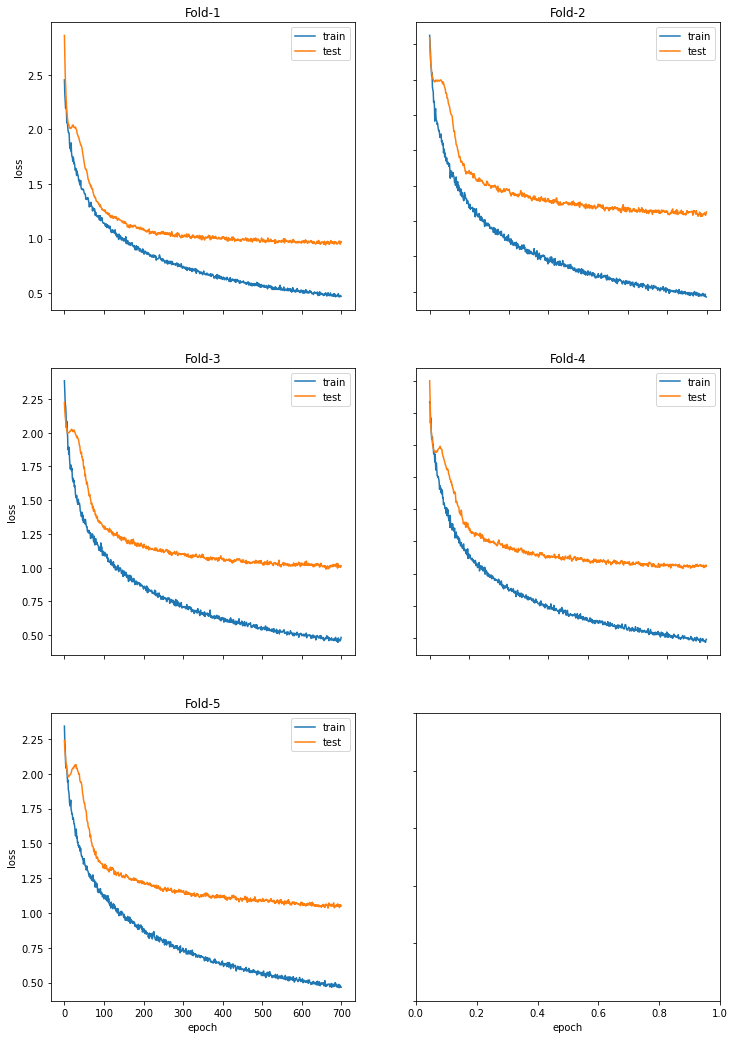

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'test'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'test'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'test'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'test'], loc='upper right')

axs[2, 0].plot(hist[4].history['loss'])
axs[2, 0].plot(hist[4].history['val_loss'])
axs[2, 0].set_title('Fold-5')
axs[2, 0].legend(['train', 'test'], loc='upper right')

#axs[2, 1].plot(hist[0].history['loss'])
#axs[2, 1].plot(hist[0].history['val_loss'])
#axs[2, 1].set_title('model loss')
#axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('ravdesFemale_5Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [ ]:
# loading json and creating model
from keras.models import model_from_json
savedir='RAVDESS_Model65/'
m='Femalemodel3' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir+m+'.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
import tensorflow as tf
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X3.npy')
yloaded=np.load(savedir+'/y3.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 77.08%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

5/5 [==============================] - 0s 16ms/step
(144, 8)
144


array([[ 7,  1,  0,  1,  0,  0,  0,  0],
       [ 4, 11,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  7,  1,  0,  0,  0,  0],
       [ 6,  2,  0, 11,  1,  2,  0,  1],
       [ 1,  0,  0,  0, 21,  0,  2,  0],
       [ 0,  0,  0,  3,  0, 23,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 16,  3],
       [ 0,  0,  1,  0,  0,  0,  0, 15]], dtype=int64)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[77.8 11.1  0.  11.1  0.   0.   0.   0. ]
 [25.  68.8  0.   6.2  0.   0.   0.   0. ]
 [11.1  0.  77.8 11.1  0.   0.   0.   0. ]
 [26.1  8.7  0.  47.8  4.3  8.7  0.   4.3]
 [ 4.2  0.   0.   0.  87.5  0.   8.3  0. ]
 [ 0.   0.   0.  11.1  0.  85.2  0.   3.7]
 [ 0.   5.   0.   0.   0.   0.  80.  15. ]
 [ 0.   0.   6.2  0.   0.   0.   0.  93.8]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry       77.8  11.1      0.0     11.1    0.0      0.0   0.0        0.0
calm        25.0  68.8      0.0      6.2    0.0      0.0   0.0        0.0
disgust     11.1   0.0     77.8     11.1    0.0      0.0   0.0        0.0
fearful     26.1   8.7      0.0     47.8    4.3      8.7   0.0        4.3
happy        4.2   0.0      0.0      0.0   87.5      0.0   8.3        0.0
neutral      0.0   0.0      0.0     11.1    0.0     85.2   0.0        3.7
sad          0.0   5.0      0.0      0.0    0.0      0.0  80.0       15.0
surprised    0.0   0.0      6.2      0.0    0.0      0.0   0.0       93.8



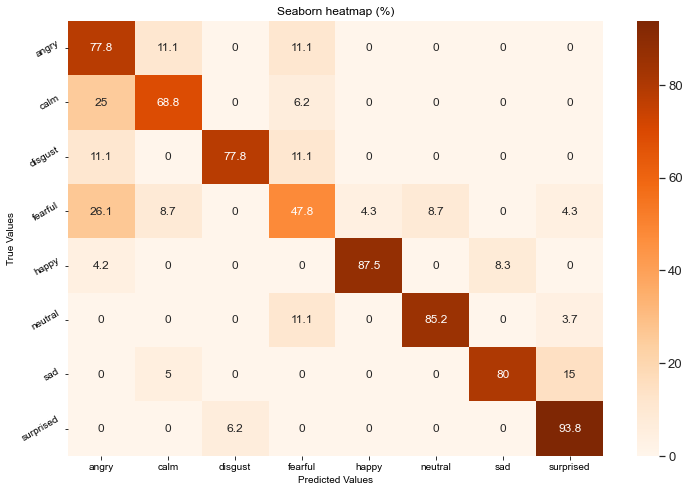

In [ ]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('ravdesFemale_65.png')
plt.show()